# DADA2 Pipeline Tutorial (1.6)

# Getting ready

In [1]:
version #record version of R
library(dada2); packageVersion("dada2") # the newer tutorials (1.12) use a slightly newer version of R and DADA2

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.4                         
year           2018                        
month          03                          
day            15                          
svn rev        74408                       
language       R                           
version.string R version 3.4.4 (2018-03-15)
nickname       Someone to Lean On          

Loading required package: Rcpp


[1] ‘1.6.0’

In [2]:
path <- "~/MiSeq_SOP" # CHANGE ME to the directory containing the fastq files after unzipping.
list.files(path)

[1] "conda.sh"                            "F3D0_S188_L001_R1_001.fastq"        
 [3] "F3D0_S188_L001_R2_001.fastq"         "F3D141_S207_L001_R1_001.fastq"      
 [5] "F3D141_S207_L001_R2_001.fastq"       "F3D142_S208_L001_R1_001.fastq"      
 [7] "F3D142_S208_L001_R2_001.fastq"       "F3D143_S209_L001_R1_001.fastq"      
 [9] "F3D143_S209_L001_R2_001.fastq"       "F3D144_S210_L001_R1_001.fastq"      
[11] "F3D144_S210_L001_R2_001.fastq"       "F3D145_S211_L001_R1_001.fastq"      
[13] "F3D145_S211_L001_R2_001.fastq"       "F3D146_S212_L001_R1_001.fastq"      
[15] "F3D146_S212_L001_R2_001.fastq"       "F3D147_S213_L001_R1_001.fastq"      
[17] "F3D147_S213_L001_R2_001.fastq"       "F3D148_S214_L001_R1_001.fastq"      
[19] "F3D148_S214_L001_R2_001.fastq"       "F3D149_S215_L001_R1_001.fastq"      
[21] "F3D149_S215_L001_R2_001.fastq"       "F3D150_S216_L001_R1_001.fastq"      
[23] "F3D150_S216_L001_R2_001.fastq"       "F3D1_S189_L001_R1_001.fastq"        
[25] "F3D1_S189_L001_R2_001.fastq"         "F3D2_S190_L001_R1_001.fastq"        
[27] "F3D2_S190_L001_R2_001.fastq"         "F3D3_S191_L001_R1_001.fastq"        
[29] "F3D3_S191_L001_R2_001.fastq"         "F3D5_S193_L001_R1_001.fastq"        
[31] "F3D5_S193_L001_R2_001.fastq"         "F3D6_S194_L001_R1_001.fastq"        
[33] "F3D6_S194_L001_R2_001.fastq"         "F3D7_S195_L001_R1_001.fastq"        
[35] "F3D7_S195_L001_R2_001.fastq"         "F3D8_S196_L001_R1_001.fastq"        
[37] "F3D8_S196_L001_R2_001.fastq"         "F3D9_S197_L001_R1_001.fastq"        
[39] "F3D9_S197_L001_R2_001.fastq"         "HMP_MOCK.v35.fasta"                 
[41] "Mock_S280_L001_R1_001.fastq"         "Mock_S280_L001_R2_001.fastq"        
[43] "mouse.dpw.metadata"                  "mouse.time.design"                  
[45] "silva_nr_v132_train_set.fa.gz"       "silva_species_assignment_v132.fa.gz"
[47] "stability.batch"                     "stability.files"

In [3]:
# Forward and reverse fastq filenames have format: SAMPLENAME_R1_001.fastq and SAMPLENAME_R2_001.fastq
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
sample.names <- sapply(strsplit(basename(fnFs), "_"), `[`, 1)

# Examine quality profiles of forward and reverse reads

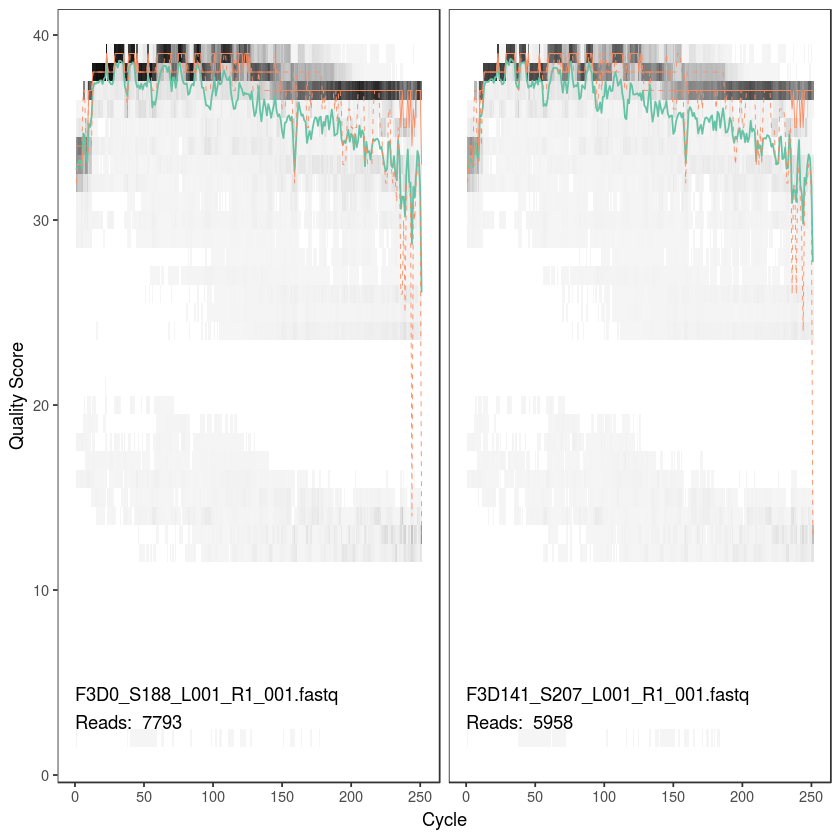

In [4]:
plotQualityProfile(fnFs[1:2])

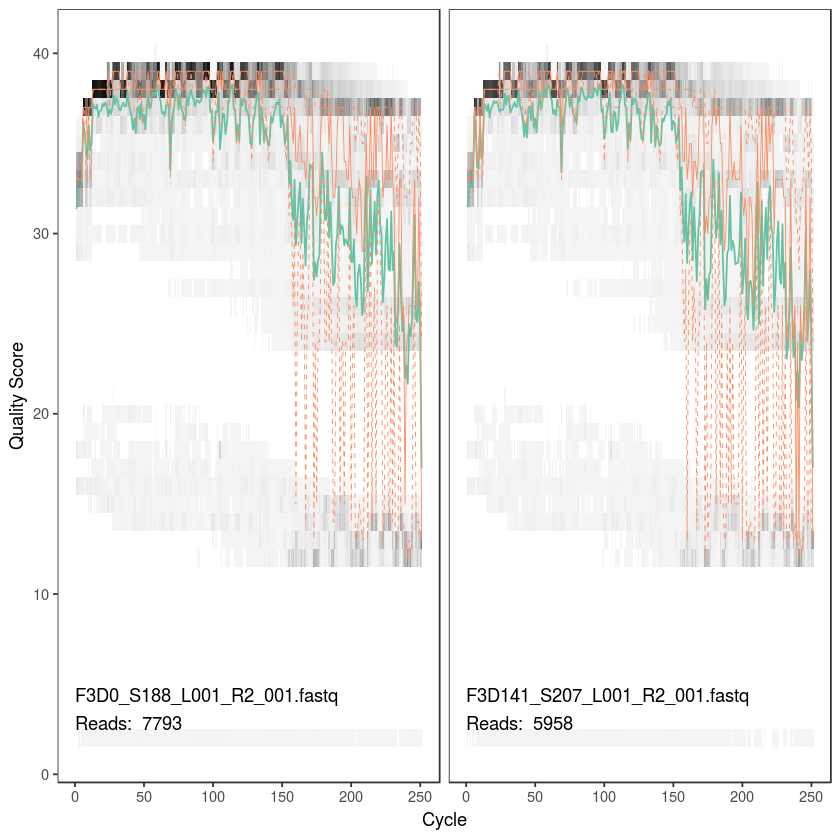

In [5]:
plotQualityProfile(fnRs[1:2])

# Perform filtering and trimming

In [6]:
# Place filtered files in filtered/ subdirectory
filt_path <- file.path(path, "filtered") # Place filtered files in filtered/ subdirectory
filtFs <- file.path(filt_path, paste0(sample.names, "_F_filt.fastq.gz"))
filtRs <- file.path(filt_path, paste0(sample.names, "_R_filt.fastq.gz"))


In [7]:
out <- filterAndTrim(fnFs, filtFs, fnRs, filtRs, truncLen=c(240,160),
              maxN=0, maxEE=c(2,2), truncQ=2, rm.phix=TRUE,
              compress=TRUE, multithread=TRUE) # On Windows set multithread=FALSE
head(out)

Creating output directory: /home/users/courses/ml5/MiSeq_SOP/filtered


,reads.in,reads.out
F3D0_S188_L001_R1_001.fastq,7793,7113
F3D141_S207_L001_R1_001.fastq,5958,5463
F3D142_S208_L001_R1_001.fastq,3183,2914
F3D143_S209_L001_R1_001.fastq,3178,2941
F3D144_S210_L001_R1_001.fastq,4827,4312
F3D145_S211_L001_R1_001.fastq,7377,6741


# Learn the Error Rates

In [8]:
errF <- learnErrors(filtFs, multithread=TRUE)

Initializing error rates to maximum possible estimate.
Sample 1 - 7113 reads in 1979 unique sequences.
Sample 2 - 5463 reads in 1477 unique sequences.
Sample 3 - 2914 reads in 904 unique sequences.
Sample 4 - 2941 reads in 939 unique sequences.
Sample 5 - 4312 reads in 1267 unique sequences.
Sample 6 - 6741 reads in 1756 unique sequences.
Sample 7 - 4560 reads in 1438 unique sequences.
Sample 8 - 15637 reads in 3590 unique sequences.
Sample 9 - 11413 reads in 2762 unique sequences.
Sample 10 - 12017 reads in 3021 unique sequences.
Sample 11 - 5032 reads in 1566 unique sequences.
Sample 12 - 5299 reads in 1639 unique sequences.
Sample 13 - 18075 reads in 3707 unique sequences.
Sample 14 - 6250 reads in 1479 unique sequences.
Sample 15 - 4052 reads in 1195 unique sequences.
Sample 16 - 7369 reads in 1832 unique sequences.
Sample 17 - 4765 reads in 1183 unique sequences.
Sample 18 - 4871 reads in 1382 unique sequences.
Sample 19 - 6504 reads in 1709 unique sequences.
Sample 20 - 4314 read

In [9]:
errR <- learnErrors(filtRs, multithread=TRUE)

Initializing error rates to maximum possible estimate.
Sample 1 - 7113 reads in 1660 unique sequences.
Sample 2 - 5463 reads in 1335 unique sequences.
Sample 3 - 2914 reads in 853 unique sequences.
Sample 4 - 2941 reads in 880 unique sequences.
Sample 5 - 4312 reads in 1286 unique sequences.
Sample 6 - 6741 reads in 1803 unique sequences.
Sample 7 - 4560 reads in 1265 unique sequences.
Sample 8 - 15637 reads in 3414 unique sequences.
Sample 9 - 11413 reads in 2522 unique sequences.
Sample 10 - 12017 reads in 2771 unique sequences.
Sample 11 - 5032 reads in 1415 unique sequences.
Sample 12 - 5299 reads in 1349 unique sequences.
Sample 13 - 18075 reads in 3290 unique sequences.
Sample 14 - 6250 reads in 1390 unique sequences.
Sample 15 - 4052 reads in 1134 unique sequences.
Sample 16 - 7369 reads in 1635 unique sequences.
Sample 17 - 4765 reads in 1084 unique sequences.
Sample 18 - 4871 reads in 1161 unique sequences.
Sample 19 - 6504 reads in 1502 unique sequences.
Sample 20 - 4314 read

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”

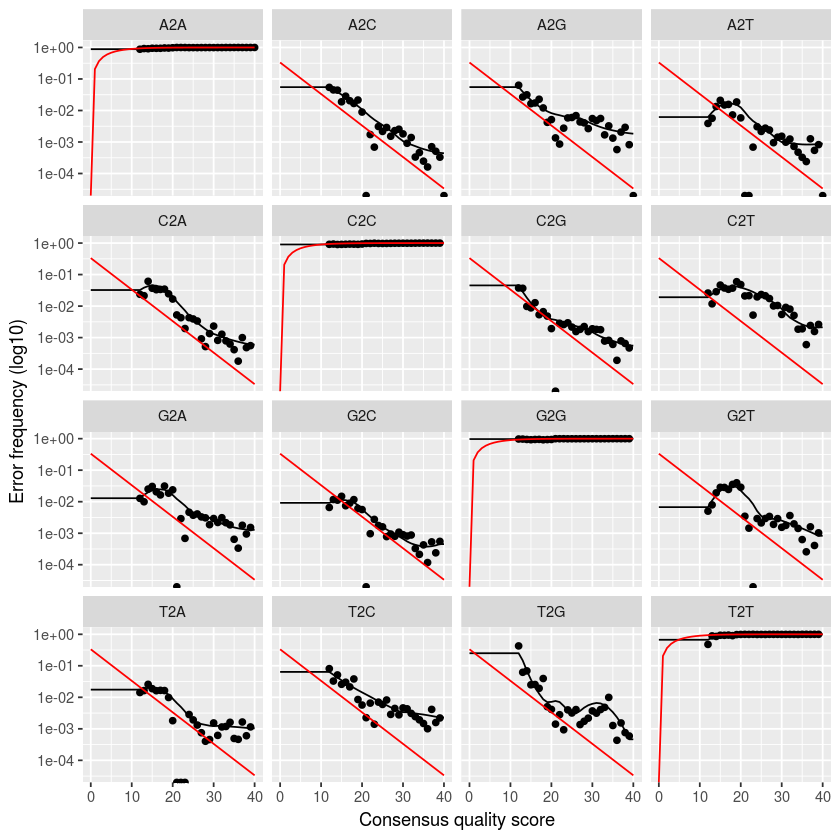

In [10]:
plotErrors(errF, nominalQ=TRUE)

# Dereplication

In [11]:
derepFs <- derepFastq(filtFs, verbose=TRUE)
derepRs <- derepFastq(filtRs, verbose=TRUE)
# Name the derep-class objects by the sample names
names(derepFs) <- sample.names
names(derepRs) <- sample.names

Dereplicating sequence entries in Fastq file: ~/MiSeq_SOP/filtered/F3D0_F_filt.fastq.gz
Encountered 1979 unique sequences from 7113 total sequences read.
Dereplicating sequence entries in Fastq file: ~/MiSeq_SOP/filtered/F3D141_F_filt.fastq.gz
Encountered 1477 unique sequences from 5463 total sequences read.
Dereplicating sequence entries in Fastq file: ~/MiSeq_SOP/filtered/F3D142_F_filt.fastq.gz
Encountered 904 unique sequences from 2914 total sequences read.
Dereplicating sequence entries in Fastq file: ~/MiSeq_SOP/filtered/F3D143_F_filt.fastq.gz
Encountered 939 unique sequences from 2941 total sequences read.
Dereplicating sequence entries in Fastq file: ~/MiSeq_SOP/filtered/F3D144_F_filt.fastq.gz
Encountered 1267 unique sequences from 4312 total sequences read.
Dereplicating sequence entries in Fastq file: ~/MiSeq_SOP/filtered/F3D145_F_filt.fastq.gz
Encountered 1756 unique sequences from 6741 total sequences read.
Dereplicating sequence entries in Fastq file: ~/MiSeq_SOP/filtered/F

# Sample Inference

In [12]:
dadaFs <- dada(derepFs, err=errF, multithread=TRUE)
dadaRs <- dada(derepRs, err=errR, multithread=TRUE)

Sample 1 - 7113 reads in 1979 unique sequences.
Sample 2 - 5463 reads in 1477 unique sequences.
Sample 3 - 2914 reads in 904 unique sequences.
Sample 4 - 2941 reads in 939 unique sequences.
Sample 5 - 4312 reads in 1267 unique sequences.
Sample 6 - 6741 reads in 1756 unique sequences.
Sample 7 - 4560 reads in 1438 unique sequences.
Sample 8 - 15637 reads in 3590 unique sequences.
Sample 9 - 11413 reads in 2762 unique sequences.
Sample 10 - 12017 reads in 3021 unique sequences.
Sample 11 - 5032 reads in 1566 unique sequences.
Sample 12 - 5299 reads in 1639 unique sequences.
Sample 13 - 18075 reads in 3707 unique sequences.
Sample 14 - 6250 reads in 1479 unique sequences.
Sample 15 - 4052 reads in 1195 unique sequences.
Sample 16 - 7369 reads in 1832 unique sequences.
Sample 17 - 4765 reads in 1183 unique sequences.
Sample 18 - 4871 reads in 1382 unique sequences.
Sample 19 - 6504 reads in 1709 unique sequences.
Sample 20 - 4314 reads in 897 unique sequences.
Sample 1 - 7113 reads in 166

In [13]:
dadaFs[[1]]

dada-class: object describing DADA2 denoising results
128 sample sequences were inferred from 1979 input unique sequences.
Key parameters: OMEGA_A = 1e-40, BAND_SIZE = 16, USE_QUALS = TRUE

# Merge paired reads

In [14]:
mergers <- mergePairs(dadaFs, derepFs, dadaRs, derepRs, verbose=TRUE)
# Inspect the merger data.frame from the first sample
head(mergers[[1]])

6600 paired-reads (in 105 unique pairings) successfully merged out of 7113 (in 254 pairings) input.
5047 paired-reads (in 78 unique pairings) successfully merged out of 5463 (in 199 pairings) input.
2663 paired-reads (in 52 unique pairings) successfully merged out of 2914 (in 142 pairings) input.
2575 paired-reads (in 54 unique pairings) successfully merged out of 2941 (in 162 pairings) input.
3668 paired-reads (in 53 unique pairings) successfully merged out of 4312 (in 203 pairings) input.
6203 paired-reads (in 81 unique pairings) successfully merged out of 6741 (in 230 pairings) input.
4040 paired-reads (in 90 unique pairings) successfully merged out of 4560 (in 233 pairings) input.
14340 paired-reads (in 142 unique pairings) successfully merged out of 15637 (in 409 pairings) input.
10599 paired-reads (in 117 unique pairings) successfully merged out of 11413 (in 331 pairings) input.
11196 paired-reads (in 134 unique pairings) successfully merged out of 12017 (in 343 pairings) input.


sequence,abundance,forward,reverse,nmatch,nmismatch,nindel,prefer,accept
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<lgl>
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGAAGATCAAGTCAGCGGTAAAATTGAGAGGCTCAACCTCTTCGAGCCGTTGAAACTGGTTTTCTTGAGTGAGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCTCAACTGACGCTCATGCACGAAAGTGTGGGTATCGAACAGG,586,1,1,148,0,0,1,TRUE
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCAAACAGG,471,2,2,148,0,0,2,TRUE
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTGTTAAGTCAGCGGTCAAATGTCGGGGCTCAACCCCGGCCTGCCGTTGAAACTGGCGGCCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCGACTGACGCTGAGGCACGAAAGCGTGGGTATCGAACAGG,451,3,4,148,0,0,1,TRUE
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGCTTTTAAGTCAGCGGTAAAAATTCGGGGCTCAACCCCGTCCGGCCGTTGAAACTGGGGGCCTTGAGTGGGCGAGAAGAAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCCTTCCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCGAACAGG,433,4,3,148,0,0,2,TRUE
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGCAGGCGGACTCTCAAGTCAGCGGTCAAATCGCGGGGCTCAACCCCGTTCCGCCGTTGAAACTGGGAGCCTTGAGTGCGCGAGAAGTAGGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCCTACCGGCGCGCAACTGACGCTCATGCACGAAAGCGTGGGTATCGAACAGG,353,5,6,148,0,0,1,TRUE
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGGATGCCAAGTCAGCGGTAAAAAAGCGGTGCTCAACGCCGTCGAGCCGTTGAAACTGGCGTTCTTGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACTCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGCGTGGGTATCGAACAGG,285,6,5,148,0,0,2,TRUE


# Construct sequence table

In [15]:
seqtab <- makeSequenceTable(mergers)
dim(seqtab)

The sequences being tabled vary in length.


[1]  20 288

In [16]:
# Inspect distribution of sequence lengths
table(nchar(getSequences(seqtab)))


251 252 253 254 255 
  1  87 192   6   2 

# Remove Chimeras

In [17]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)
dim(seqtab.nochim)

Identified 59 bimeras out of 288 input sequences.


[1]  20 229

In [18]:
sum(seqtab.nochim)/sum(seqtab)

[1] 0.9643085

# Track your reads

In [ ]:
getN <- function(x) sum(getUniques(x))
track <- cbind(out, sapply(dadaFs, getN), sapply(dadaRs, getN), sapply(mergers, getN), rowSums(seqtab.nochim))
# If processing a single sample, remove the sapply calls: e.g. replace sapply(dadaFs, getN) with getN(dadaFs)
colnames(track) <- c("input", "filtered", "denoisedF", "denoisedR", "merged", "nonchim")
rownames(track) <- sample.names
head(track)

# Assign Taxonomy

In [ ]:
taxa <- assignTaxonomy(seqtab.nochim, "~/MiSeq_SOP/silva_nr_v132_train_set.fa.gz", multithread=TRUE) #using slightly newer version of silva

In [ ]:
taxa <- addSpecies(taxa, "~/MiSeq_SOP/silva_species_assignment_v132.fa.gz") #slightly newer version of silva

In [ ]:
taxa.print <- taxa # Removing sequence rownames for display only
rownames(taxa.print) <- NULL
head(taxa.print)

# Evaluate accuracy

In [ ]:
unqs.mock <- seqtab.nochim["Mock",]
unqs.mock <- sort(unqs.mock[unqs.mock>0], decreasing=TRUE) # Drop ASVs absent in the Mock
cat("DADA2 inferred", length(unqs.mock), "sample sequences present in the Mock community.\n")

In [ ]:
mock.ref <- getSequences(file.path(path, "HMP_MOCK.v35.fasta"))
match.ref <- sum(sapply(names(unqs.mock), function(x) any(grepl(x, mock.ref))))
cat("Of those,", sum(match.ref), "were exact matches to the expected reference sequences.\n")

# Handoff to Phyloseq

In [ ]:
library(phyloseq); packageVersion("phyloseq")

In [ ]:
library(ggplot2); packageVersion("ggplot2")

In [ ]:
samples.out <- rownames(seqtab.nochim)
subject <- sapply(strsplit(samples.out, "D"), `[`, 1)
gender <- substr(subject,1,1)
subject <- substr(subject,2,999)
day <- as.integer(sapply(strsplit(samples.out, "D"), `[`, 2))
samdf <- data.frame(Subject=subject, Gender=gender, Day=day)
samdf$When <- "Early"
samdf$When[samdf$Day>100] <- "Late"
rownames(samdf) <- samples.out

In [ ]:
ps <- phyloseq(otu_table(seqtab.nochim, taxa_are_rows=FALSE), 
               sample_data(samdf), 
               tax_table(taxa))
ps <- prune_samples(sample_names(ps) != "Mock", ps) # Remove mock sample
ps

In [ ]:
plot_richness(ps, x="Day", measures=c("Shannon", "Simpson"), color="When") + theme_bw()

In [ ]:
ord.nmds.bray <- ordinate(ps, method="NMDS", distance="bray")

In [ ]:
plot_ordination(ps, ord.nmds.bray, color="When", title="Bray NMDS")

In [ ]:
top20 <- names(sort(taxa_sums(ps), decreasing=TRUE))[1:20]
ps.top20 <- transform_sample_counts(ps, function(OTU) OTU/sum(OTU))
ps.top20 <- prune_taxa(top20, ps.top20)
plot_bar(ps.top20, x="Day", fill="Family") + facet_wrap(~When, scales="free_x")

# Testing abundance differences using DESeq2

DESeq2 estimates variance-mean dependence in count data from high-throughput sequencing assays and test for differential expression based on a model using the negative binomial distribution. It adjusts for library differences so no need for rarefying your data.

## Import into DESeq2:

In [ ]:
library("DESeq2"); packageVersion("DESeq2"); 

The following two lines actually do all the complicated DESeq2 work. The function phyloseq_to_deseq2 converts your phyloseq-format microbiome data into a DESeqDataSet with dispersions estimated, using the experimental design formula, also shown (the ~Mouse+When term). The DESeq function does the rest of the testing, in this case with default testing framework, but you can actually use alternatives.

In [ ]:
diagdds = phyloseq_to_deseq2(ps, ~ When)
# calculate geometric means prior to estimate size factors
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(diagdds), 1, gm_mean)
diagdds = estimateSizeFactors(diagdds, geoMeans = geoMeans)
diagdds = DESeq(diagdds, fitType="local")

Note: The default multiple-testing correction is Benjamini-Hochberg, and occurs within the DESeq function.
The following results function call creates a table of the results of the tests. The hard work was already stored with the rest of the DESeq2-related data in our latest version of the diagdds object (see above). We order by the adjusted p-value, removing the entries with an NA value. The rest of this example is just formatting the results table with taxonomic information for nice(ish) display.

In [ ]:
res = results(diagdds)
res = res[order(res$padj, na.last=NA), ]
alpha = 0.01
sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(ps)[rownames(sigtab), ], "matrix"))
#replace sequences with numbers for better viewing
rownames(sigtab) <- 1:nrow(sigtab)
head(sigtab)

The code below will display a bar plot showing the log2-fold-change, showing Genus and Family. Uses some ggplot2 commands.

In [ ]:
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Family order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Family, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Family = factor(as.character(sigtabgen$Family), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Family)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
